11501568/11490434 [==============================] - 0s 0us/step
Epoch 1/50
469/469 [==============================] - 19s 37ms/step - loss: 0.2432 - accuracy: 0.9250 - val_loss: 0.1022 - val_accuracy: 0.9667
Epoch 2/50
469/469 [==============================] - 10s 22ms/step - loss: 0.1029 - accuracy: 0.9682 - val_loss: 0.0870 - val_accuracy: 0.9735
Epoch 3/50
469/469 [==============================] - 10s 21ms/step - loss: 0.0749 - accuracy: 0.9768 - val_loss: 0.1066 - val_accuracy: 0.9691
Epoch 4/50
469/469 [==============================] - 10s 21ms/step - loss: 0.0597 - accuracy: 0.9818 - val_loss: 0.0680 - val_accuracy: 0.9814
Epoch 5/50
469/469 [==============================] - 10s 22ms/step - loss: 0.0493 - accuracy: 0.9850 - val_loss: 0.0901 - val_accuracy: 0.9781
Epoch 6/50
469/469 [==============================] - 10s 21ms/step - loss: 0.0442 - accuracy: 0.9865 - val_loss: 0.0792 - val_accuracy: 0.9795
Epoch 7/50
469/469 [==============================] - 10s 21ms/step - l

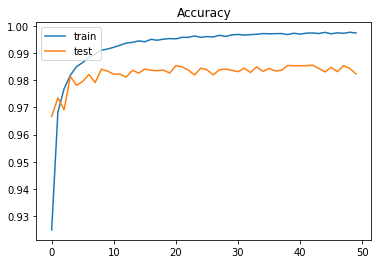

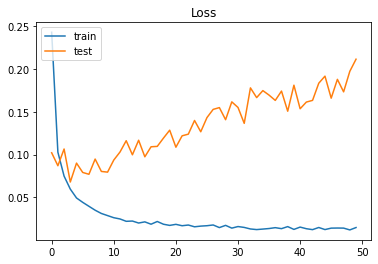

In [1]:
# MLPでMNISTの分類問題に挑戦
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
# from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.optimizers import RMSprop
from keras.datasets import mnist
import matplotlib.pyplot as plt

# 入力と出力を指定
in_size = 28 * 28
out_size = 10

# MNISTのデータを読み込み
(X_train, y_train), (X_test, y_test) = mnist.load_data()
# データを28*28=784の一次元配列に変換
X_train = X_train.reshape(-1, 784).astype('float32') / 255
X_test = X_test.reshape(-1, 784).astype('float32') / 255

# データのOneHotエンコーディング
from tensorflow.keras import utils as np_utils

y_train = np_utils.to_categorical(y_train.astype('int32'))
y_test = np_utils.to_categorical(y_test.astype('int32'))


# MLPモデル構造を定義
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(in_size,)))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(out_size, activation='softmax'))

# モデルをコンパイル
model.compile(
    loss='categorical_crossentropy',
    optimizer=RMSprop(),
    metrics=['accuracy'])

# 学習を実行
hist = model.fit(X_train, y_train,
          batch_size=128, 
          epochs=50,
          verbose=1,
          validation_data=(X_test, y_test))

# モデルを評価
score = model.evaluate(X_test, y_test, verbose=1)
print('正解率=', score[1], 'loss=', score[0])

# 学習の様子をグラフへ描画
# 正解率の推移をプロット
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Accuracy')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# ロスの推移をプロット
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Loss')
plt.legend(['train', 'test'], loc='upper left')
plt.show()